In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
IMG_SIZE=224
BATCH_SIZE=32

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Alzimer_segmented_images/Train',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  subset='training')


Found 68 images belonging to 4 classes.


In [7]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Alzimer_segmented_images/Test',
                                                target_size=(IMG_SIZE,IMG_SIZE),
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                subset='validation')

Found 15 images belonging to 4 classes.


In [8]:
class_indices=train_generator.class_indices
print(class_indices)
class_names=list(class_indices.keys())
print(class_names)

{'mild_demented': 0, 'moderate_demented': 1, 'non_demented': 2, 'verymild_demented': 3}
['mild_demented', 'moderate_demented', 'non_demented', 'verymild_demented']


In [9]:
model=keras.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(128,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(128,activation='relu'),
                        layers.Dense(4,activation='softmax')])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(train_generator,epochs=30,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.1589 - loss: 3.1599 - val_accuracy: 0.2667 - val_loss: 1.4191
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.2500 - loss: 1.4527 - val_accuracy: 0.2667 - val_loss: 1.3726
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.3897 - loss: 1.3742 - val_accuracy: 0.2667 - val_loss: 1.3871
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.3125 - loss: 1.3808 - val_accuracy: 0.2667 - val_loss: 1.3942
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.2617 - loss: 1.3813 - val_accuracy: 0.2667 - val_loss: 1.3931
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.2422 - loss: 1.3816 - val_accuracy: 0.2667 - val_loss: 1.3846
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.2426 - loss: 1.3782 - val_accuracy: 0.2667 - val_loss: 1.3805
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.3904 - loss: 1.3749 - val_accuracy: 0.2667 - val_loss: 1

In [12]:
model.save('/content/drive/MyDrive/Alzimer_segmented_images/alzimer_dectecion_model.h5')

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/Alzimer_segmented_images/alzimer_dectecion_model.h5')
print('Model Loaded')

Model Loaded


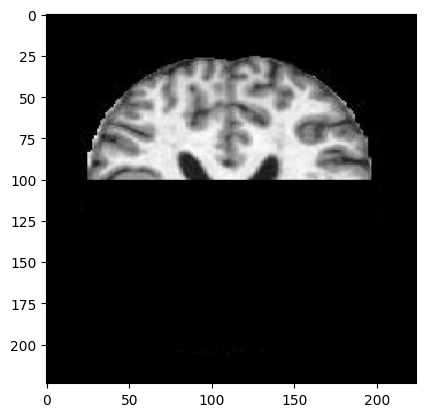

In [14]:
test_image_path='/content/drive/MyDrive/Alzimer_segmented_images/Test/non_demented/26 (63).jpg'
img=image.load_img(test_image_path, target_size=(IMG_SIZE,IMG_SIZE))
plt.imshow(img)
plt.axis()
plt.show()

In [15]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.

In [16]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
[[1.570999e-03 7.888844e-06 9.908942e-01 7.526856e-03]]


In [18]:
index=np.argmax(prediction)
print(class_names[index])

non_demented
